# Proyecto Machine Learning

In [1]:
## tratamiento de los datos
import pandas as pd
import numpy as np
import data_describe as dd

## Gráficos
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## preprocedado y modelado
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

In [2]:
## visualización de los datos
data = pd.read_csv("data/in-vehicle-coupon-recommendation.csv")
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
## tipo de columnas
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [4]:
## estructura de la data
data.shape

(12684, 26)

In [5]:
## visualizar si existen valores nulos
print("Datos que tiene NAN por columnas","\n","-"*30)
data.isna().sum().sort_values( ascending = False)

Datos que tiene NAN por columnas 
 ------------------------------


car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
Y                           0
maritalStatus               0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
occupation                  0
has_children                0
education                   0
direction_opp               0
income                      0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
destination                 0
dtype: int64

In [6]:
## porcentaje de nan de cada columna
(data.isna().sum().sort_values( ascending = False) / data.shape[0]) * 100

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
Y                        0.000000
maritalStatus            0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
occupation               0.000000
has_children             0.000000
education                0.000000
direction_opp            0.000000
income                   0.000000
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
destination              0.000000
dtype: float64

la variable car el 99 % de sus valores son nulos

In [7]:
data.car.unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [8]:
## Summary de los datos
dd.data_summary(data,as_percentage=True)


,Info
Rows,12684
Columns,26
Size in Memory,2.5 MB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
destination,object,0.0%,0.0%,,,,,,3,49.5%
passanger,object,0.0%,0.0%,,,,,,4,57.6%
weather,object,0.0%,0.0%,,,,,,3,79.4%
temperature,int64,0.0%,0.0%,30,80,80,63.30,19.15,3,51.5%
time,object,0.0%,0.0%,,,,,,5,25.5%
coupon,object,0.0%,0.0%,,,,,,5,31.5%
expiration,object,0.0%,0.0%,,,,,,2,55.9%
gender,object,0.0%,0.0%,,,,,,2,51.3%
age,object,0.0%,0.0%,,,,,,8,20.9%
maritalStatus,object,0.0%,0.0%,,,,,,5,40.2%


None

data-describe Summary Widget

### Analizando las variables del dataset

Text(0.5, 0.98, 'Boxplot variables numéricas')

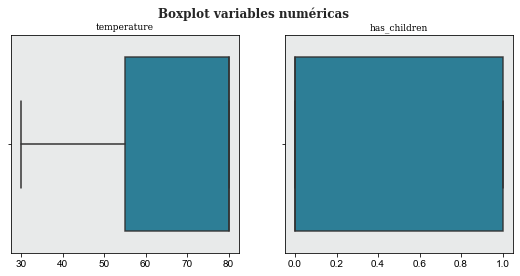

In [9]:
## Variables númericas
fig, axes = plt.subplots(nrows= 1,ncols = 2, figsize = (9,4))
axes = axes.flat

var_numeric = ['temperature','has_children']

for i,variable in enumerate(var_numeric):
    sns.set_style("whitegrid")
    sns.boxplot(data = data,
    x = variable,
    ax = axes[i],
    color =  "#057da0",
    boxprops=dict(alpha=.9)
    )
    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e8eaea')
fig.suptitle("Boxplot variables numéricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

la variable has_children es una variable categórica de 0 a 1

Text(0.5, 0.98, 'Plot bar variables categóricas')

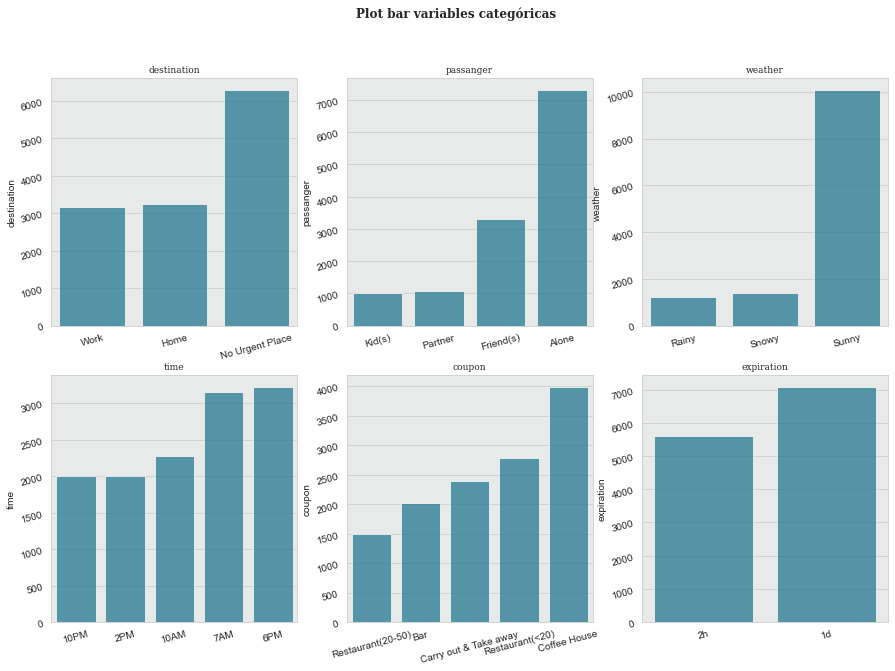

In [10]:
## variables categóricas
fig, axes = plt.subplots(nrows= 2,ncols = 3, figsize = (15,10))
axes = axes.flat

var_string = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration']

for i,variable in enumerate(var_string):
    dt_plot = data[variable].value_counts(dropna=False).sort_values().reset_index()
    sns.set_style("whitegrid")
    sns.barplot(data = dt_plot,
    x = "index",
    y = variable,
    ax = axes[i],
    color =  "#057da0",
    alpha = 0.7,
    )
    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].tick_params(labelsize = 10, rotation = 15)
    axes[i].set_facecolor('#e8eaea')
fig.suptitle("Plot bar variables categóricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Plot bar variables categóricas')

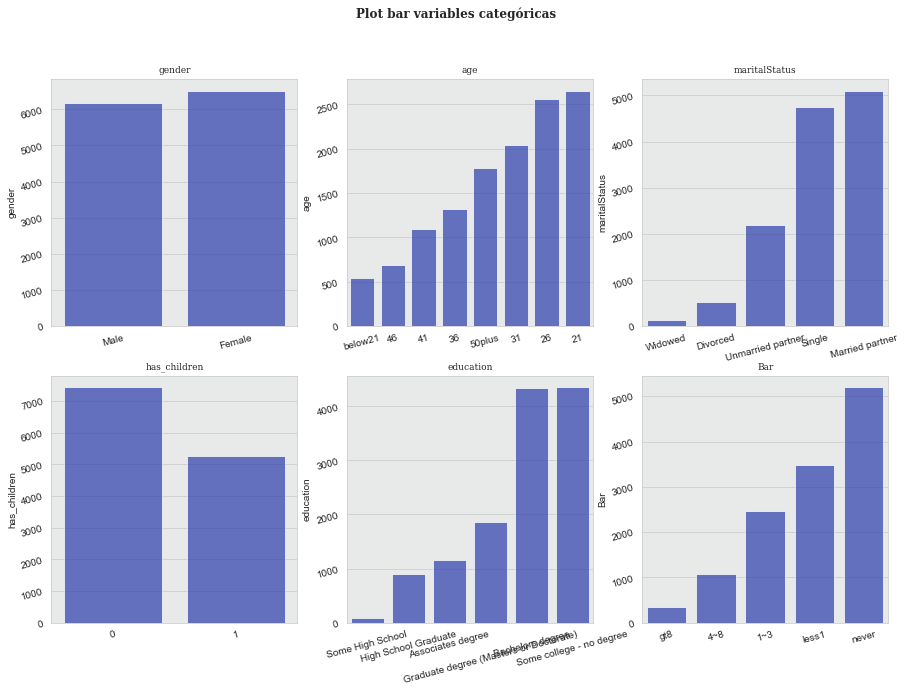

In [11]:
fig, axes = plt.subplots(nrows= 2,ncols = 3, figsize = (15,10))
axes = axes.flat

var_string = ['gender', 'age', 'maritalStatus', 'has_children',
 'education','Bar']

for i,variable in enumerate(var_string):
    dt_plot = data[variable].value_counts(dropna=False).sort_values().reset_index()
    sns.set_style("whitegrid")
    sns.barplot(data = dt_plot,
    x = "index",
    y = variable,
    ax = axes[i],
    color =  "#152ec1",
    alpha = 0.7
    )
    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e8eaea')
    axes[i].tick_params(labelsize = 10, rotation = 15)
fig.suptitle("Plot bar variables categóricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 1.0, ' Ocupación de la persona\n (Plot bar)')

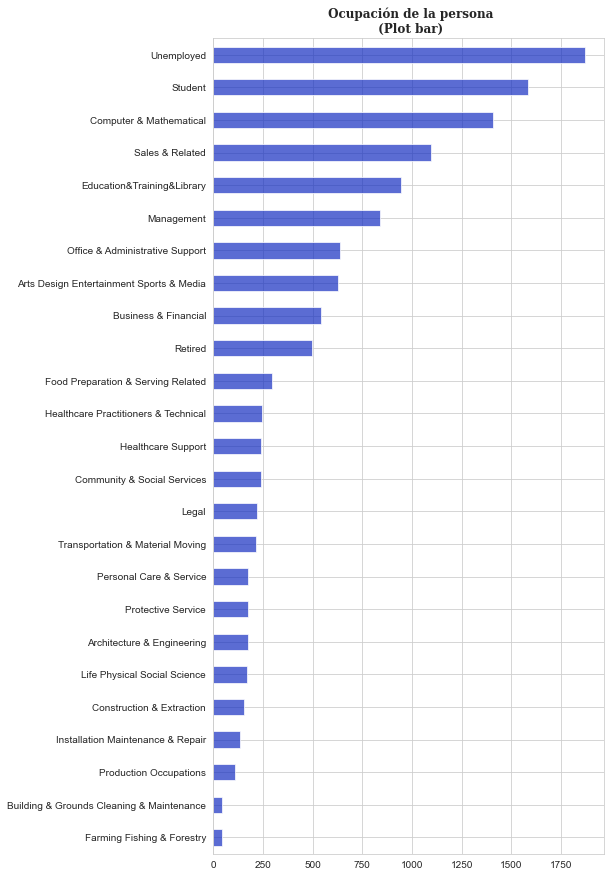

In [12]:
plt.figure(figsize = (7,15))
bars = data["occupation"].value_counts(dropna=False).sort_values().plot(kind = "barh", color = "#152ec1", alpha = 0.7)
plt.title(" Ocupación de la persona\n (Plot bar)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

In [13]:
data["occupation"].value_counts(dropna=False).sort_values(ascending= False)

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Personal Care & Service                       175
Protective Service                            175
Architecture & Engineering                    175
Life Physical Social Science                  170


Text(0.5, 0.98, 'Plot bar variables categóricas')

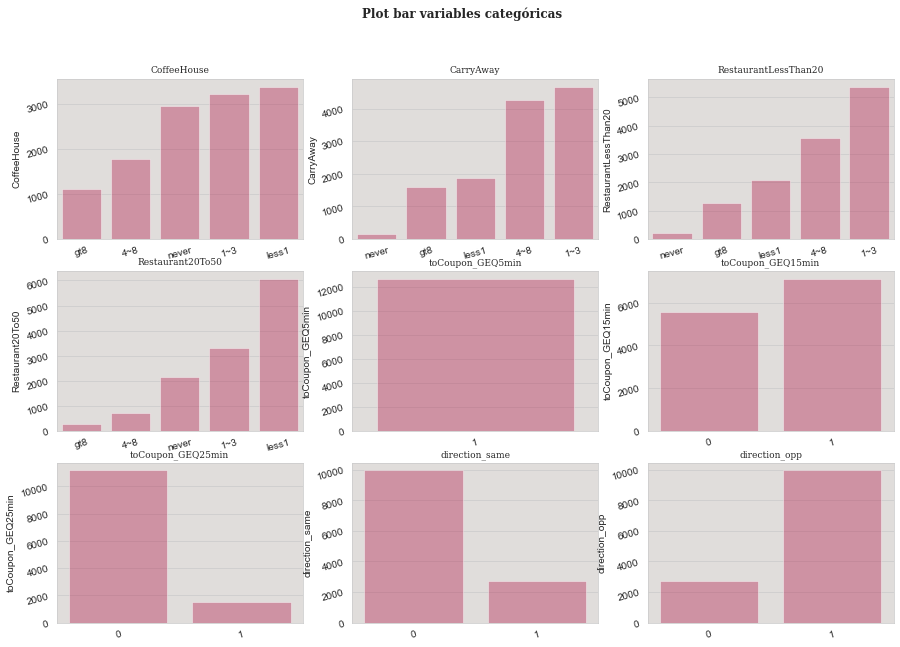

In [14]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (15,10))
axes = axes.flat

var_string =  ['CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp']

for i,variable in enumerate(var_string):
    dt_plot = data[variable].value_counts(dropna=False).sort_values().reset_index()
    sns.set_style("whitegrid")
    sns.barplot(data = dt_plot,
    x = "index",
    y = variable,
    ax = axes[i],
    color =  "#cb0b46",
    alpha = 0.4
    )
    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
fig.suptitle("Plot bar variables categóricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

In [15]:
data.direction_opp.value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

In [16]:
data.direction_same.value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

la variable direction_same y direction_opp son los opuesto uno de otro

Text(0.5, 0.98, 'Plot bar variables categóricas')

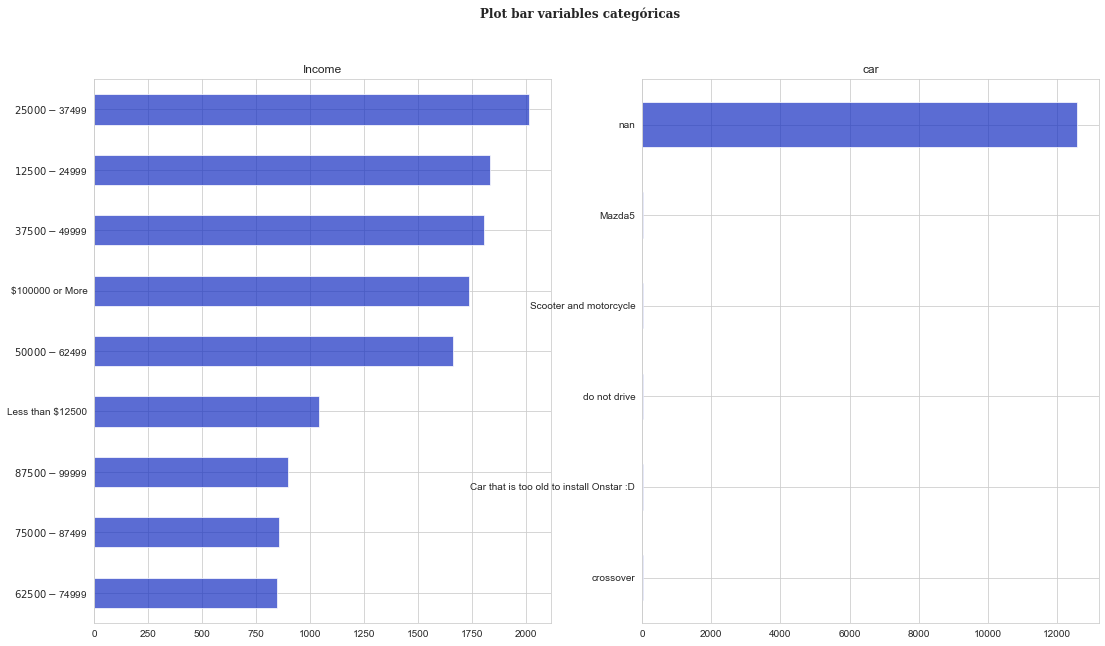

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 2, figsize = (18,10))
data["income"].value_counts(dropna=False).sort_values().plot(kind = "barh", color = "#152ec1", alpha = 0.7, ax = axes[0], title = "Income")
data["car"].value_counts(dropna=False).sort_values().plot(kind = "barh", color = "#152ec1", alpha = 0.7, ax = axes[1], title = "car")

fig.suptitle("Plot bar variables categóricas", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

<AxesSubplot:>

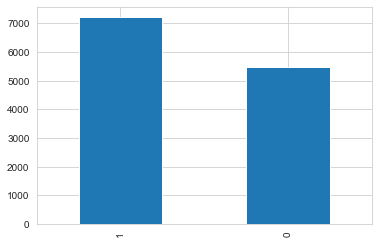

In [18]:
## Analizando la variable respuestas

data.Y.value_counts().plot(kind = "bar")

### Transformar variables categóricas a catégoricas ordenadas


age, marital_status, education, bar, time, expiration, coffehouse, carryaway, restaurantlessthan20, restaurant20to50, income

In [19]:
## Creando una copia de la data y categorizando las variables
data2 = data.copy()
data2.age = pd.Categorical(data.age, categories=['below21','21', '26', '31', '36', '41','46', '50plus'], ordered= True)
data2.Bar = pd.Categorical(data.Bar, categories = ['never', 'less1', '1~3','4~8','gt8'], ordered = True)
data2.time = pd.Categorical(data.time, categories = ['7AM', '10AM', '2PM','6PM', '10PM'], ordered = True)
data2.expiration = pd.Categorical(data.expiration, categories = ['2h','1d'], ordered = True)
data2.CoffeeHouse = pd.Categorical(data.CoffeeHouse, categories = ['never', 'less1','1~3','4~8','gt8'], ordered = True)
data2.CarryAway = pd.Categorical(data.CarryAway, categories = ['never','less1','1~3','4~8','gt8'], ordered = True)
data2.Restaurant20To50 = pd.Categorical(data.Restaurant20To50, categories = ['never','less1','1~3','4~8','gt8'], ordered = True)
data2.RestaurantLessThan20 = pd.Categorical(data.RestaurantLessThan20, categories = ['never','less1','1~3','4~8','gt8'], ordered = True)
data2.income = pd.Categorical(data.income, 
categories = ['Less than $12500','$12500 - $24999','$25000 - $37499', '$37500 - $49999','$50000 - $62499',
'$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'],
  ordered = True)

### Analizando la variable dependiente con las variables independientes

Text(0.5, 0.98, 'Variable dependiente\n (por variable categoría ordenada)')

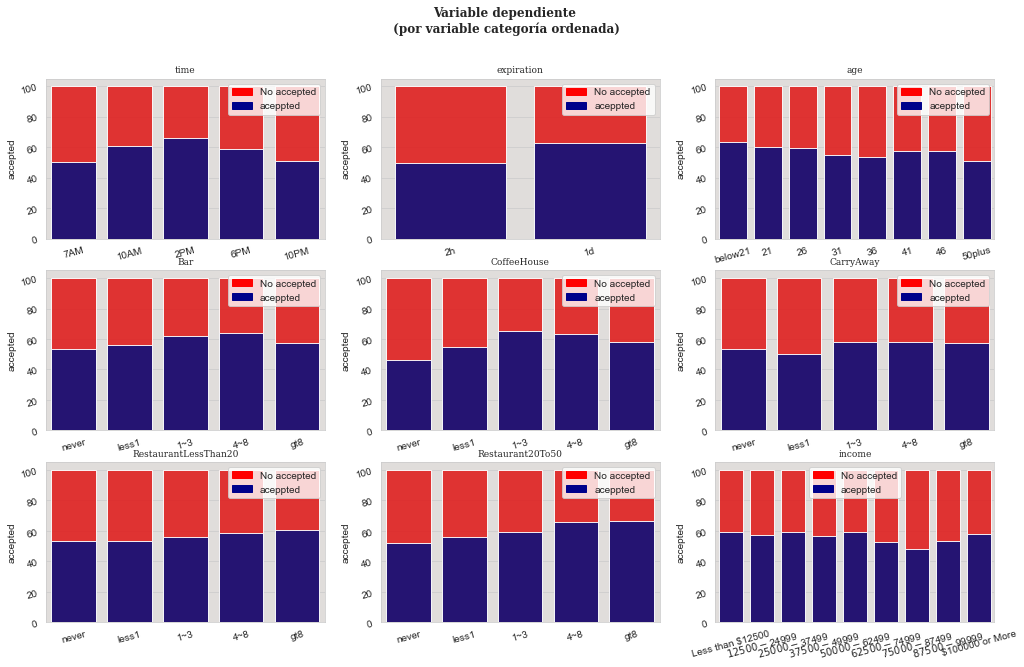

In [20]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    ## creando el grupo de dataset
    plot_y2 = pd.crosstab(data2[variable],data2.Y).reset_index().rename(columns={1:"accepted",0 : "No accepted"})
    plot_y3  = plot_y2
    plot_y3["total"]= plot_y2["accepted"]+ plot_y2["No accepted"]

    plot_y3["accepted"] = [i / j * 100 for i,j in zip(plot_y3["accepted"], plot_y3["total"])]
    plot_y3["No accepted"] = [i / j * 100 for i,j in zip(plot_y3["total"], plot_y3["total"])]

    ## plot 1
    bar1 = sns.barplot(data = plot_y3,
    x = variable, y = "No accepted", color= "red", ax = axes[i], alpha = 0.9)

    # plot 2
    bar2 = sns.barplot(data = plot_y3,
    x = variable, y = "accepted", color= "darkblue", estimator=sum, ax = axes[i], alpha = 0.9)

    # combinar

    top_bar = mpatches.Patch(color='red', label='No accepted')
    bottom_bar = mpatches.Patch(color='darkblue', label='aceppted')
    axes[i].legend(handles=[top_bar, bottom_bar])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
fig.suptitle("Variable dependiente\n (por variable categoría ordenada)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Variable dependiente\n (por variable categoría ordenada)')

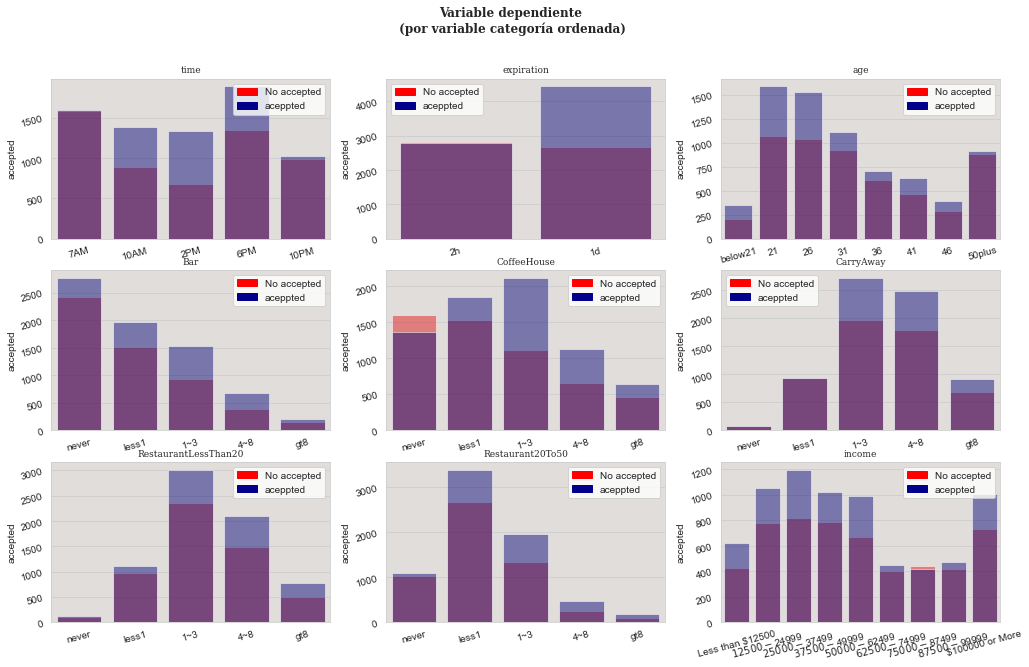

In [21]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    ## creando el grupo de dataset
    plot_y2 = pd.crosstab(data2[variable],data2.Y).reset_index().rename(columns={1:"accepted",0 : "No accepted"})

    ## plot 1
    sns.barplot(data = plot_y2,
    x = variable, y = "No accepted", color= "red", ax = axes[i], alpha = 0.5)

    # plot 2
    bottom_plot = sns.barplot(data = plot_y2,
    x = variable, y = "accepted", color= "darkblue", estimator=sum, ax = axes[i], alpha = 0.5)

    # combinar

    top_bar = mpatches.Patch(color='red', label='No accepted')
    bottom_bar = mpatches.Patch(color='darkblue', label='aceppted')
    axes[i].legend(handles=[top_bar, bottom_bar])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
fig.suptitle("Variable dependiente\n (por variable categoría ordenada)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, '')

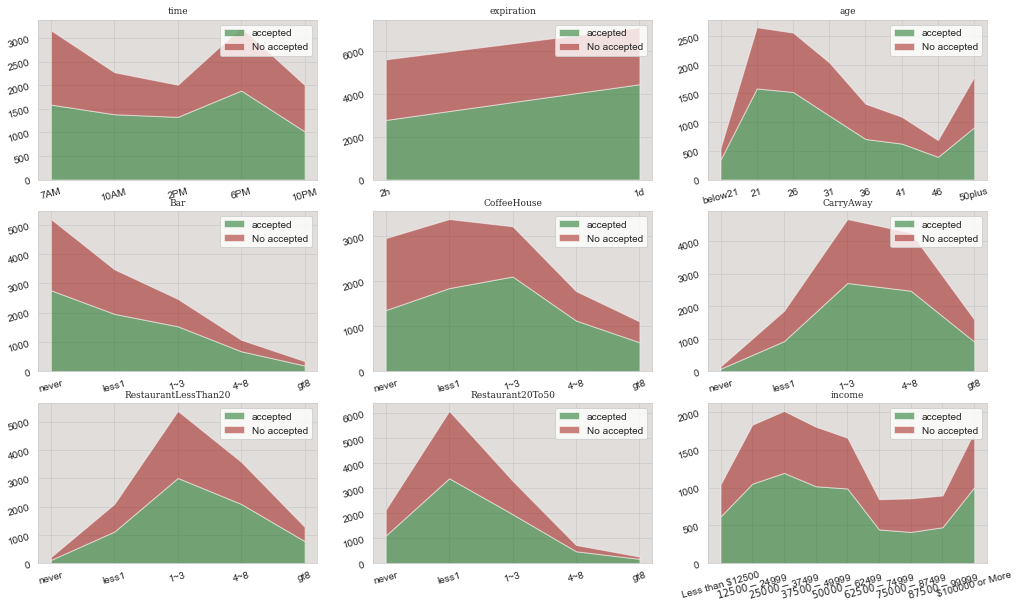

In [22]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    plot_y2 = pd.crosstab(data2[variable],data2.Y).reset_index().rename(columns={1:"accepted",0 : "No accepted"})

    axes[i].stackplot(plot_y2[variable],plot_y2["accepted"], plot_y2["No accepted"], 
    labels =["accepted","No accepted"],alpha = 0.5, colors = ["#05680e","#9a0b05"])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
    axes[i].legend(loc='upper right')
fig.suptitle("", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Variable dependiente\n (por variable categoría ordenada)')

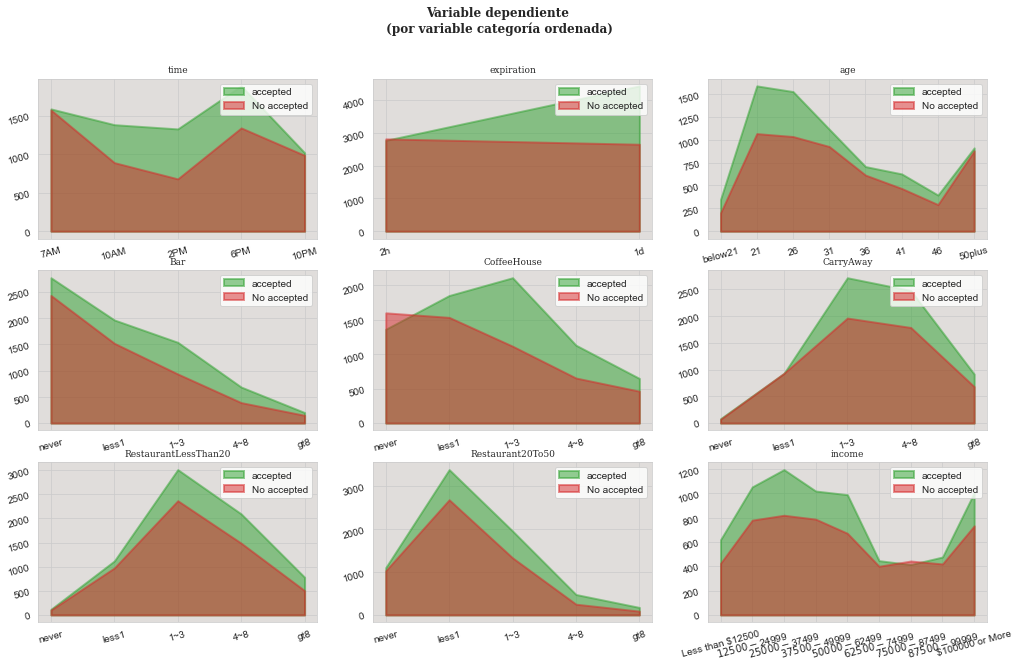

In [23]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    plot_y2 = pd.crosstab(data2[variable],data2.Y).reset_index().rename(columns={1:"accepted",0 : "No accepted"})

    axes[i].fill_between(plot_y2[variable],plot_y2["accepted"], alpha = 0.5, label ="accepted", color = 'tab:green',linewidth=2)
    axes[i].fill_between(plot_y2[variable],plot_y2["No accepted"], alpha = 0.5, label = "No accepted", color = 'tab:red', linewidth=2)

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
    axes[i].legend(loc='upper right')
fig.suptitle("Variable dependiente\n (por variable categoría ordenada)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

Text(0.5, 0.98, 'Variable dependiente\n (por variable categoría ordenada)')

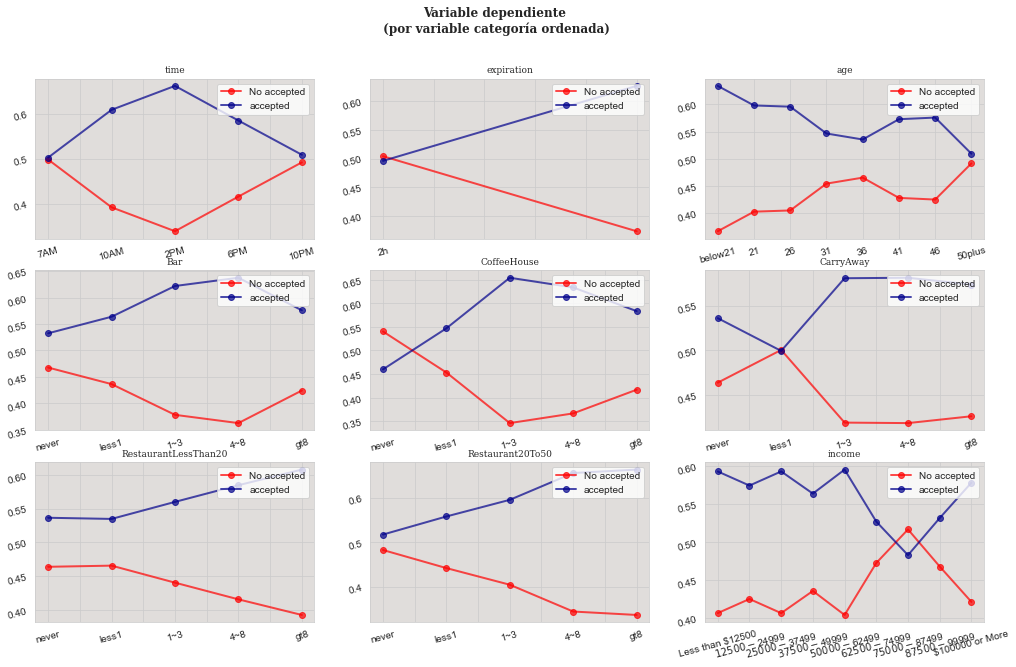

In [24]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,10))
axes = axes.flat

var_string =  ['time',
 'expiration',
 'age',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50', "income"]

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    pd.crosstab(data2[variable],data2["Y"], 
    normalize = "index").rename(
        columns = {1 : "accepted", 0: "No accepted"}).plot(color = ['red','darkblue'],marker='o', linewidth = 2, alpha = 0.7, ax = axes[i])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10, rotation = 15)
    axes[i].legend(loc='upper right')
fig.suptitle("Variable dependiente\n (por variable categoría ordenada)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")

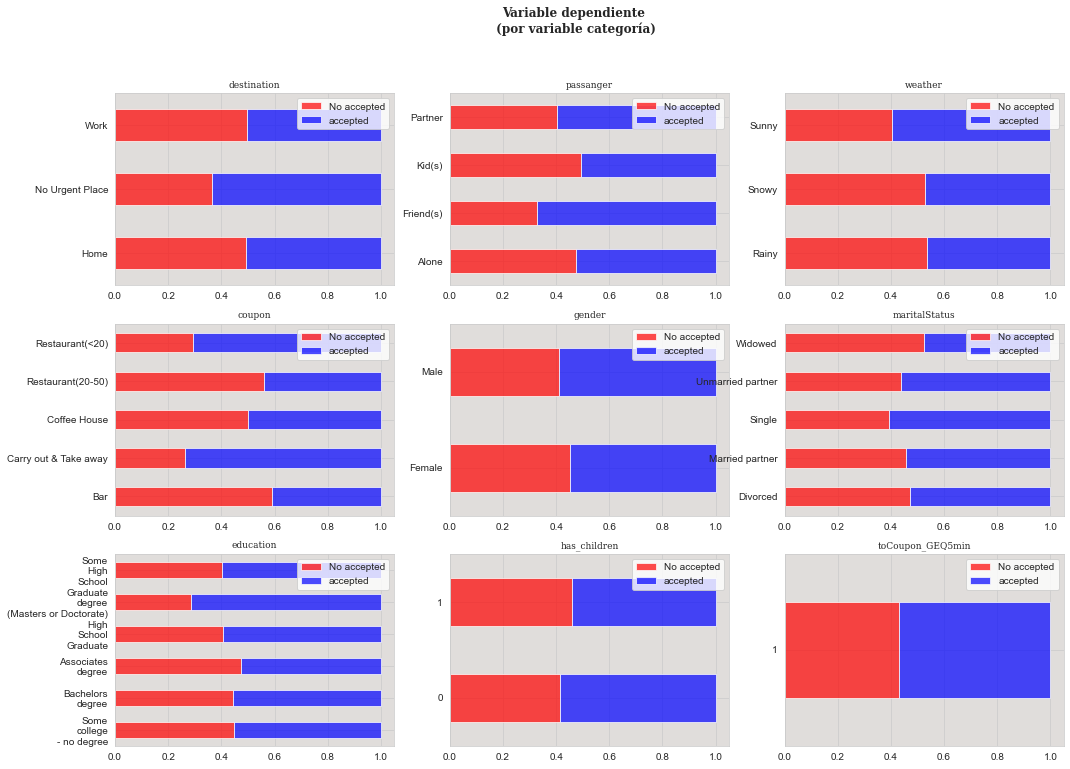

In [101]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize = (17,12))
axes = axes.flat

var_string =  ['destination', 'passanger', 'weather', 'coupon', 'gender',
       'maritalStatus', 'education', "has_children", 'toCoupon_GEQ5min']

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    pd.crosstab(data2[variable],data2.Y,
    normalize = "index").rename(columns = {1 : "accepted", 0: "No accepted"}).plot(kind = "barh", stacked = True, 
    color = ["r","b"], alpha = 0.7, ax = axes[i])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10,direction='out')
    axes[i].legend(loc='upper right')
fig.suptitle("Variable dependiente\n (por variable categoría)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")
etiqueta = data2.education.str.replace("\s","\n", n = 2).unique().tolist()
axes[6].set_yticklabels(etiqueta)
plt.show()

In [26]:
data2.toCoupon_GEQ5min.value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [27]:
data2.select_dtypes(include = "object").columns
# ocuppation sacado
#'toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same', 'direction_opp'

Index(['destination', 'passanger', 'weather', 'coupon', 'gender',
       'maritalStatus', 'education', 'occupation', 'car'],
      dtype='object')

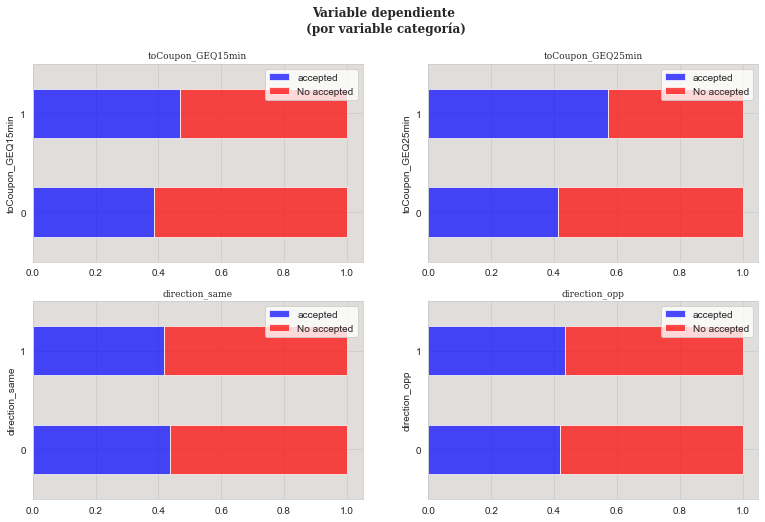

In [28]:
fig, axes = plt.subplots(nrows= 2,ncols = 2, figsize = (13,8))
axes = axes.flat

var_string =  ['toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same', 'direction_opp']

for i,variable in enumerate(var_string):
    
    sns.set_style("whitegrid")
    pd.crosstab(data2[variable],data2.Y,
    normalize = "index").rename(columns = {0 : "accepted", 1: "No accepted"}).plot(kind = "barh", stacked = True, 
    color = ["b","r"], alpha = 0.7, ax = axes[i])

    axes[i].set_title(variable,fontsize = 9, fontfamily="serif")
    axes[i].set_xlabel("")
    axes[i].set_facecolor('#e0dddb')
    axes[i].tick_params(labelsize = 10,direction='out')
    axes[i].legend(loc='upper right')
fig.suptitle("Variable dependiente\n (por variable categoría)", fontsize = 12, 
fontweight = "bold",fontfamily="serif")
plt.show()

In [29]:
# PREPARANDO LOS DATOS PARA EL MODELO DE MACHINE LEARNING

In [30]:
## 1. Eliminar la variable "car"
data2 = data2.drop(columns = "car")

In [31]:
## 2. las variables con NaN ( imputarla o eliminarlas)

In [32]:
## 3. Pasar Variables númericas a categóricas
data2.temperature.value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [33]:
data2.temperature = data2.temperature.astype("object")

In [34]:
##4. la variables marital_status,Bar,education, CarryAway,
##restaurantLessThan20, Restaurant20to50, tiene muy pocos 
## valores que en el modelo de entrenamiento puede que no aparezca.

In [35]:
## 5 - agrupar la variable e n categorías
## 	0 - Unemployed
##  1 - Student
##	2 - Retired
##	3 - Employed

## Unemployed
category_new = np.where(data.occupation == "Unemployed", "0",data.occupation)
# Student
category_new = np.where(category_new == "Student", "1",category_new)
# Retired
category_new = np.where(category_new == "Retired", "2",category_new)
## Employed
category_new = np.where((category_new == "0") | (category_new == "1")| (category_new == "2"),category_new,"3")


pd.unique(category_new)

array(['0', '3', '1', '2'], dtype=object)

In [36]:
data3 = data2.copy()
data3.occupation = category_new

In [37]:
#6. hacer el modelo con la variable sin transformar, tranformandolo
#por industrias o áreas en el que trabaja.

In [38]:
# 9. Eliminar la variable de direction_opp
# direcction_opp y direcction_same son variables opuestas, pero similares.
data3.direction_opp.value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

In [39]:
data3.direction_same.value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

In [40]:
data3 = data3.drop(columns=["direction_opp"])

In [41]:
## 10 - ELIMINAR LA VARIABLE toCoupon_GEQ5min
data3.toCoupon_GEQ5min.value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [42]:
data3 = data3.drop(columns = ["toCoupon_GEQ5min"])

In [43]:
## 11 - eliminación de las filas que contengan NaN
data3 = data3.dropna(axis= 0, how = "any")

In [44]:
data3.isna().sum().sum()

0

In [45]:
data.shape, data3.shape

((12684, 26), (12079, 23))

### Preparación del dataset para el modelo de machine learning

In [46]:
data3.temperature = data3.temperature.astype("int64")

In [47]:
## separando los datos en variables x and y
X = data3.iloc[:,:-1]
y = data3.iloc[:,-1]

In [48]:
## Standarizar las variables
X.select_dtypes(include = "int64").head(5)

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
22,55,0,0,0,0
23,80,0,0,0,0
24,80,0,0,0,0
25,80,0,1,0,0
26,80,0,0,0,0


"Para este dataset no existe variables númericas que se puedan estandarizar"

In [49]:
## codificar las variables categóricas a valores de 0 a 1

var_object = data3.select_dtypes(include = ["object"]).columns.tolist()
one_encoder = OneHotEncoder(drop="first")
categorización = ColumnTransformer(transformers=[("one_hot_encoder",one_encoder,var_object)],
                remainder= "passthrough")


In [50]:
x2 = categorización.fit_transform(X[var_object])

In [51]:
x2.shape

(12079, 24)

In [52]:
## guardando en un dataset
name_object = categorización.named_transformers_["one_hot_encoder"].get_feature_names(var_object)
x2 = pd.DataFrame(x2.toarray(),columns = name_object)

In [53]:
## considerando las variables que son categorías ordenadas

var_cat = data3.select_dtypes(include = ["category"]).columns.tolist()

orden = []

for i in var_cat:
  new = X[i].cat.categories.tolist()
  orden.append(new)

cat_ordinal = OrdinalEncoder( categories= orden,
unknown_value = np.nan,
handle_unknown = 'use_encoded_value')

x3 = cat_ordinal.fit_transform(X[var_cat])

x3 = pd.DataFrame(x3,columns = var_cat)
x3.head()

,time,expiration,age,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,2.0,1.0,1.0,5.0,0.0,1.0,3.0,3.0,1.0
1,1.0,0.0,1.0,5.0,0.0,1.0,3.0,3.0,1.0
2,1.0,1.0,1.0,5.0,0.0,1.0,3.0,3.0,1.0
3,1.0,0.0,1.0,5.0,0.0,1.0,3.0,3.0,1.0
4,2.0,1.0,1.0,5.0,0.0,1.0,3.0,3.0,1.0


In [54]:
x3.shape

(12079, 9)

In [55]:
## concatenando las columnas
x_finish = pd.concat([X.select_dtypes(include = "int64").reset_index(drop = True),x2,x3], axis = 1)

In [56]:
dd.data_summary(x_finish,as_percentage=True)

,Info
Rows,12079
Columns,38
Size in Memory,3.5 MB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
temperature,int64,0.0%,0.0%,30,80,80,63.33,19.13,3,51.5%
has_children,int64,0.0%,0.0%,0,0,1,0.41,0.49,2,59.2%
toCoupon_GEQ15min,int64,0.0%,0.0%,0,1,1,0.56,0.50,2,56.1%
toCoupon_GEQ25min,int64,0.0%,0.0%,0,0,1,0.12,0.32,2,88.1%
direction_same,int64,0.0%,0.0%,0,0,1,0.22,0.41,2,78.5%
destination_No Urgent Place,float64,0.0%,0.0%,0,0,1,0.49,0.50,2,50.6%
destination_Work,float64,0.0%,0.0%,0,0,1,0.25,0.43,2,75.0%
passanger_Friend(s),float64,0.0%,0.0%,0,0,1,0.26,0.44,2,73.9%
passanger_Kid(s),float64,0.0%,0.0%,0,0,1,0.078,0.27,2,92.2%
passanger_Partner,float64,0.0%,0.0%,0,0,1,0.085,0.28,2,91.5%


None

data-describe Summary Widget

In [57]:
## realizando la partición de la base de datos ( entrenamiento y testeo)

x_train, x_test, y_train, y_test = train_test_split(x_finish,y,
test_size = 0.3, 
shuffle = True,
random_state = 45,
stratify = y
)

In [58]:
y_train.value_counts(normalize= True)

1    0.569367
0    0.430633
Name: Y, dtype: float64

In [59]:
y_test.value_counts(normalize= True)

1    0.56926
0    0.43074
Name: Y, dtype: float64

### Realizando el modelo de machine learning ( Logit)

In [60]:
logit_model = LogisticRegression(max_iter=350)

In [61]:
logit_model.fit(x_train, y_train)

c:\Users\jose2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=350)

In [62]:
predict_train = logit_model.predict(x_train)
predict_test = logit_model.predict(x_test)

In [63]:
metrics.accuracy_score(y_train,predict_train)

0.6861028976936724

In [64]:
metrics.accuracy_score(y_test,predict_test)

0.6735651214128036

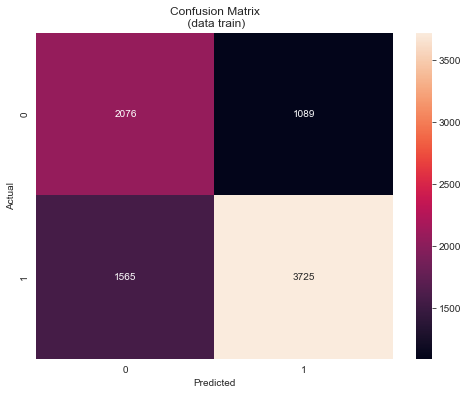

In [65]:
confusion_matrix = pd.crosstab(predict_train, y_train, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data train)")
plt.show()

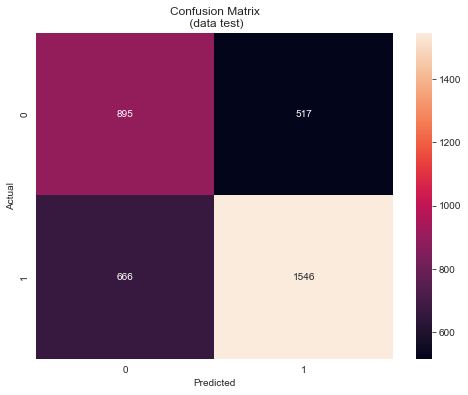

In [66]:
confusion_matrix = pd.crosstab(predict_test, y_test, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data test)")
plt.show()

In [67]:
## Método de elección de variables

rfe = RFE(estimator= LogisticRegression(max_iter=350), n_features_to_select=20)
rfe.fit(x_train,y_train)

c:\Users\jose2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



RFE(estimator=LogisticRegression(max_iter=350), n_features_to_select=20)

In [68]:
rfe.ranking_

array([19,  8,  4,  6,  1,  1,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 14,  2,  1, 13,  1, 12, 18,  1,  5, 11,  1, 17, 16, 10,
        1, 15,  9,  3])

In [69]:
rfe.support_

array([False, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False])

In [70]:
x_train2 = x_train.loc[:,rfe.support_.tolist()]
x_test2 = x_test.loc[:,rfe.support_.tolist()]

In [71]:
logit_model = LogisticRegression(max_iter=350, C = 0.01)

In [72]:
logit_model.fit(x_train2,y_train)

LogisticRegression(C=0.01, max_iter=350)

In [73]:
predict_train2 = logit_model.predict(x_train2)
predict_test2 = logit_model.predict(x_test2)

In [74]:
metrics.accuracy_score(y_train,predict_train2)

0.6759314015375517

In [75]:
metrics.accuracy_score(y_test,predict_test2)

0.6658388520971302

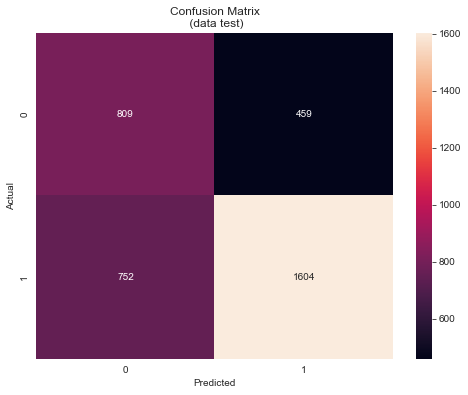

In [76]:
confusion_matrix = pd.crosstab(predict_test2, y_test, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data test)")
plt.show()

In [77]:
print((809 / (752 + 809))*100,"\n","="*25)
print((1604 / (1604 + 459))*100)

51.82575272261371 
77.75084827920504


In [78]:
print((1604 / (1604 + 752))*100)

68.08149405772495


In [79]:
print(metrics.classification_report(y_test, predict_test2))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57      1561
           1       0.68      0.78      0.73      2063

    accuracy                           0.67      3624
   macro avg       0.66      0.65      0.65      3624
weighted avg       0.66      0.67      0.66      3624



In [80]:
## coeficientes del modelo logit

logit_model.coef_

array([[ 0.291278  ,  0.4535791 ,  0.25674904, -0.24558755,  0.17945863,
        -0.16511128,  0.35943267,  0.78945227, -0.0530949 , -0.08081223,
         0.70415721,  0.15730832,  0.02953028,  0.14829824,  0.01253268,
        -0.27504365,  0.06541415, -0.13656107,  0.58291968,  0.19169203]])

In [81]:
x_train2.columns

Index(['direction_same', 'destination_No Urgent Place', 'passanger_Friend(s)',
       'passanger_Kid(s)', 'passanger_Partner', 'weather_Snowy',
       'weather_Sunny', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'gender_Male',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner',
       'education_Graduate degree (Masters or Doctorate)',
       'education_Some High School', 'occupation_2', 'expiration',
       'CoffeeHouse'],
      dtype='object')

In [82]:
logit_model.coef_.reshape(20)

array([ 0.291278  ,  0.4535791 ,  0.25674904, -0.24558755,  0.17945863,
       -0.16511128,  0.35943267,  0.78945227, -0.0530949 , -0.08081223,
        0.70415721,  0.15730832,  0.02953028,  0.14829824,  0.01253268,
       -0.27504365,  0.06541415, -0.13656107,  0.58291968,  0.19169203])

In [83]:
pd.DataFrame(data = {
    "x": x_train2.columns.tolist(),
    "coeficiente": logit_model.coef_.reshape(20),
    "Odd ratios": np.exp(logit_model.coef_.reshape(20))
}
).sort_values("coeficiente", ascending= False)

,x,coeficiente,Odd ratios
7,coupon_Carry out & Take away,0.789452,2.202190
10,coupon_Restaurant(<20),0.704157,2.022142
18,expiration,0.582920,1.791261
1,destination_No Urgent Place,0.453579,1.573935
6,weather_Sunny,0.359433,1.432516
0,direction_same,0.291278,1.338137
2,passanger_Friend(s),0.256749,1.292721
19,CoffeeHouse,0.191692,1.211297
4,passanger_Partner,0.179459,1.196569
11,gender_Male,0.157308,1.170356


In [84]:
## validación cruzada
logit_model = LogisticRegression(max_iter=350)
cv = KFold(n_splits = 10, shuffle = True, random_state= 25)
cv2 = RepeatedKFold(n_splits=5, n_repeats=5, random_state=25)
scores = cross_val_score(logit_model,x_train2,y_train,scoring="accuracy",cv = cv2, n_jobs= 1)


scores

array([0.66410408, 0.69485512, 0.67060911, 0.68480189, 0.68894145,
       0.68302779, 0.68598462, 0.68007096, 0.6759314 , 0.68066233,
       0.68835009, 0.67652277, 0.6759314 , 0.67120047, 0.68953282,
       0.68657599, 0.67001774, 0.68007096, 0.67652277, 0.68361916,
       0.66942637, 0.6759314 , 0.67297457, 0.68835009, 0.70431697])

In [85]:
print("Medida de validación cruzada: ", scores.mean())

Medida de validación cruzada:  0.6807332939089297


Text(0.5, 1.0, 'Accuracy')

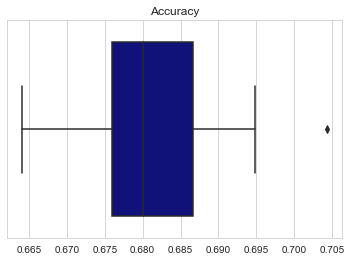

In [86]:
sns.boxplot(
    x = scores,
    color= "darkblue"
)
plt.title("Accuracy")

In [87]:
## probando con Extreme Gradient Boosting 
from xgboost import XGBClassifier


In [88]:
classifier = XGBClassifier( )
classifier.fit(x_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [89]:
for i,j in zip(x_train.columns,classifier.feature_importances_):
    print(i, ": ",j)

temperature :  0.017581502
has_children :  0.02066333
toCoupon_GEQ15min :  0.021686312
toCoupon_GEQ25min :  0.04422535
direction_same :  0.026925333
destination_No Urgent Place :  0.026714232
destination_Work :  0.01594764
passanger_Friend(s) :  0.027290087
passanger_Kid(s) :  0.030014252
passanger_Partner :  0.02477064
weather_Snowy :  0.018525852
weather_Sunny :  0.026229085
coupon_Carry out & Take away :  0.06744955
coupon_Coffee House :  0.039721355
coupon_Restaurant(20-50) :  0.037816253
coupon_Restaurant(<20) :  0.08101332
gender_Male :  0.018134879
maritalStatus_Married partner :  0.024388598
maritalStatus_Single :  0.022229163
maritalStatus_Unmarried partner :  0.022779442
maritalStatus_Widowed :  0.009387812
education_Bachelors degree :  0.020762943
education_Graduate degree (Masters or Doctorate) :  0.022651754
education_High School Graduate :  0.019563826
education_Some High School :  0.010239887
education_Some college - no degree :  0.018141853
occupation_1 :  0.022978866
o

In [90]:
pd.DataFrame(data = {
    "x": x_train.columns,
    "importance": classifier.feature_importances_
}).sort_values("importance", ascending= False)

,x,importance
15,coupon_Restaurant(<20),0.081013
12,coupon_Carry out & Take away,0.067450
3,toCoupon_GEQ25min,0.044225
13,coupon_Coffee House,0.039721
30,expiration,0.038774
14,coupon_Restaurant(20-50),0.037816
34,CoffeeHouse,0.034883
8,passanger_Kid(s),0.030014
7,passanger_Friend(s),0.027290
4,direction_same,0.026925


In [91]:
x_train.columns

Index(['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Snowy', 'weather_Sunny', 'coupon_Carry out & Take away',
       'coupon_Coffee House', 'coupon_Restaurant(20-50)',
       'coupon_Restaurant(<20)', 'gender_Male',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',
       'education_High School Graduate', 'education_Some High School',
       'education_Some college - no degree', 'occupation_1', 'occupation_2',
       'occupation_3', 'time', 'expiration', 'age', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

In [92]:
predict_test3  = classifier.predict(x_test)
predict_test3

array([0, 1, 1, ..., 0, 1, 1])

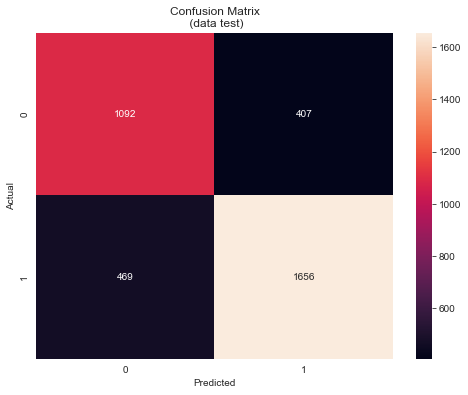

In [93]:
confusion_matrix = pd.crosstab(predict_test3, y_test, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data test)")
plt.show()

In [109]:
print("Informe de resultados")
print("-"*60)
print(metrics.classification_report(y_test, predict_test3))

Informe de resultados
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      1561
           1       0.78      0.80      0.79      2063

    accuracy                           0.76      3624
   macro avg       0.75      0.75      0.75      3624
weighted avg       0.76      0.76      0.76      3624



In [ ]:
metrics.accuracy_score(y_test,predict_test3)

0.7582781456953642